<a href="https://colab.research.google.com/github/ShestovaEkaterina/Lab/blob/master/Homework_6_(Big_Data__Spark).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка PySpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

In [4]:
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz

spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sorttable.js.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-slf4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scopt.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scala.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sbt-launch-lib.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-respond.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-reflectasm.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pyrolite.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-py4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-protobuf.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pmml-model

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Домашнее задание
- Скачайте dataset iris https://gist.github.com/netj/8836201
- Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
- Визуализируйте точечный график (plt.scatter) по каждой паре параметров
- Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
- Сделайте отдельную колонку для своего предсказания
- Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [0]:
df = spark.read.csv('iris_1.csv', inferSchema=True, header=True)

In [12]:
df.take(5)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, variety='Setosa'),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, variety='Setosa')]

In [16]:
df.groupBy('variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [17]:
df.groupBy('variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [18]:
df.groupBy('variety').avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
sepal_length = df[['sepal_length']].collect()
sepal_width = df[['sepal_width']].collect()
petal_length = df[['petal_length']].collect()
petal_width = df[['petal_width']].collect()

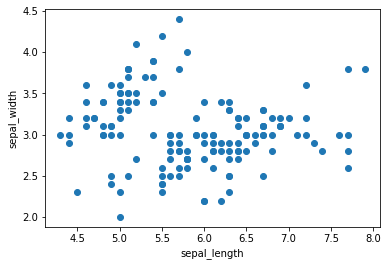

In [25]:
plt.scatter(sepal_length, sepal_width)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()


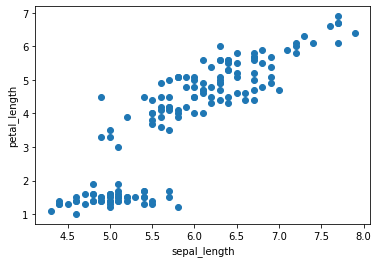

In [26]:
plt.scatter(sepal_length, petal_length)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

На графике выше видно группу точек, которая очень хорошо отделяется от остальных. При  этом показатель petal_length для этой группы не больше 2. Если посмотреть на вычисленные значения максимума petal_length для Setosa, то увидим, что он составляет 1.9, в то время как для остальных видов значения petal_length начинаются с 3 для Versicolor и 4.5 для Virginica.

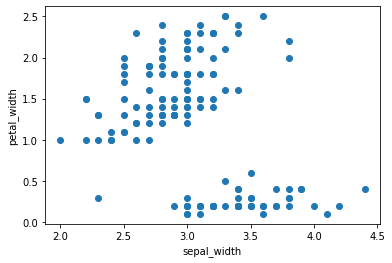

In [27]:
plt.scatter(sepal_width, petal_width)
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.show()

Как мы видели выше, если petal_length > 1.9, то это или Virginica или Versicolor. Таким образом, проверим условие, что если petal_length < 2, то это Setosa.

In [0]:
df_filter = df.where((df['petal_length'] < 2))
pd_df_setosa = df_filter.toPandas()
pd_df_setosa['predict'] = 'setosa'

In [39]:
pd_df_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,predict
0,5.1,3.5,1.4,0.2,Setosa,setosa
1,4.9,3.0,1.4,0.2,Setosa,setosa
2,4.7,3.2,1.3,0.2,Setosa,setosa
3,4.6,3.1,1.5,0.2,Setosa,setosa
4,5.0,3.6,1.4,0.2,Setosa,setosa


In [44]:
pd_df_setosa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   variety       50 non-null     object 
 5   predict       50 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


Получили 50 предсказанных значений Setosa. 
Посчитаем количество правильно угаданных значений.

In [43]:
errors = pd_df_setosa.where((pd_df_setosa['variety'] != "Setosa"))
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  0 non-null      float64
 1   sepal_width   0 non-null      float64
 2   petal_length  0 non-null      float64
 3   petal_width   0 non-null      float64
 4   variety       0 non-null      object 
 5   predict       0 non-null      object 
dtypes: float64(4), object(2)
memory usage: 2.5+ KB


Получили, что все значения, которые вошли в датафрейм pd_df_setosa угаданы верно.

Проверим, не остались ли у нас ирисы вида Setosa, которые не вошли в датафрейм pd_df_setosa.

In [0]:
df_not_setosa = df.where((df['petal_length'] >= 2))


In [48]:
not_setosa = df_not_setosa.where((df_not_setosa['variety'] == 'Setosa'))
pd_not_setosa = not_setosa.toPandas()
pd_not_setosa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  0 non-null      object
 1   sepal_width   0 non-null      object
 2   petal_length  0 non-null      object
 3   petal_width   0 non-null      object
 4   variety       0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


Видим, что таких значений нет. 
Таким образом, можно говорить о том, что был найден такой параметр, по которому безошибочно можно отделить вид Setosa от других видов ирисов.